In [1]:
import torch
import numpy as np
import time

## Basic

In [2]:
x = torch.Tensor(4,3)
print(x)

tensor([[ 0.0000e+00, -8.5899e+09,  0.0000e+00],
        [-8.5899e+09,  4.2981e+21,  6.3828e+28],
        [ 3.8016e-39,  0.0000e+00,  0.0000e+00],
        [-8.5899e+09,  0.0000e+00, -8.5899e+09]])


In [3]:
x = torch.rand(4,3)
print(x)
print(x.size())

tensor([[0.5051, 0.5517, 0.9906],
        [0.6874, 0.3775, 0.8861],
        [0.8743, 0.5547, 0.4622],
        [0.4603, 0.0146, 0.4563]])
torch.Size([4, 3])


In [4]:
y = torch.rand(4,3)
print(x+y)

tensor([[0.7126, 0.6919, 1.8503],
        [1.2580, 0.8235, 1.5663],
        [1.8027, 1.1550, 0.9255],
        [1.0745, 0.3226, 1.3383]])


In [5]:
print(torch.add(x,y))

tensor([[0.7126, 0.6919, 1.8503],
        [1.2580, 0.8235, 1.5663],
        [1.8027, 1.1550, 0.9255],
        [1.0745, 0.3226, 1.3383]])


In [6]:
y.add_(x)

tensor([[0.7126, 0.6919, 1.8503],
        [1.2580, 0.8235, 1.5663],
        [1.8027, 1.1550, 0.9255],
        [1.0745, 0.3226, 1.3383]])

In [7]:
y

tensor([[0.7126, 0.6919, 1.8503],
        [1.2580, 0.8235, 1.5663],
        [1.8027, 1.1550, 0.9255],
        [1.0745, 0.3226, 1.3383]])

In [8]:
x

tensor([[0.5051, 0.5517, 0.9906],
        [0.6874, 0.3775, 0.8861],
        [0.8743, 0.5547, 0.4622],
        [0.4603, 0.0146, 0.4563]])

In [9]:
print(x[:,2])

tensor([0.9906, 0.8861, 0.4622, 0.4563])


In [10]:
x.view(12,1)

tensor([[0.5051],
        [0.5517],
        [0.9906],
        [0.6874],
        [0.3775],
        [0.8861],
        [0.8743],
        [0.5547],
        [0.4622],
        [0.4603],
        [0.0146],
        [0.4563]])

In [11]:
torch.from_numpy(np.ones(5))

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [12]:
np.ones(5)+1

array([2., 2., 2., 2., 2.])

In [13]:
t0 = time.time()
if torch.cuda.is_available():
    print("yo")
    x = x.cuda()
    y = y.cuda()
    x + y
time.time() - t0

7.486343383789062e-05

## Autograd

In [14]:
from torch.autograd import Variable

In [102]:
x = torch.ones(2,2, requires_grad=True)
y = x+2
z = y * y * 3
out = z.mean()

print(x)
print(y)
print(z)
print(out)
print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>)
tensor(27., grad_fn=<MeanBackward1>)
None
None
None
None


In [103]:
out.backward()
print(x)
print(y)
print(z)
print(out)
print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>)
tensor(27., grad_fn=<MeanBackward1>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
None
None
None


In [141]:
x = torch.tensor(torch.from_numpy(np.array([1.,2.,3.])), requires_grad=True)
y = (3*x**2 + 2).sum()

In [148]:
y.backward()

In [170]:
x.grad

tensor([ 102.4000, 1024.0000,    0.1024])

In [171]:
x = torch.randn(3, requires_grad=True)
y = x*2
while y.data.norm() < 1000:
    y = y*2
print(y)

gradients = torch.tensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x)
print(x.grad)

tensor([ -809.8691,   648.2529, -1037.9739], grad_fn=<MulBackward>)
tensor([-1.5818,  1.2661, -2.0273], requires_grad=True)
tensor([ 51.2000, 512.0000,   0.0512])


##  Neural Network

In [80]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [81]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [82]:
params = list(net.parameters())

In [83]:
print(len(params))

10


In [85]:
print(params[0].size())

torch.Size([6, 1, 5, 5])


In [106]:
input = Variable(torch.randn(1,1,32,32))
output = net(input)
print(output)

Variable containing:
-0.0918 -0.0065  0.0752 -0.0858  0.0375 -0.0520 -0.1249  0.0313 -0.1174 -0.0487
[torch.FloatTensor of size 1x10]



In [107]:
net.zero_grad()
output.backward(torch.randn(1,10))

In [108]:
target = Variable(torch.arange(1,11))
target = target.view(1,-1)
criterion = nn.MSELoss()

In [109]:
loss = criterion(output, target)
print(loss)

Variable containing:
 39.0085
[torch.FloatTensor of size 1]



In [110]:
print(loss.grad_fn)

In [111]:
print(loss.grad_fn.next_functions[0][0])

In [112]:
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [114]:
input = Variable(torch.randn(1,1,32,32))
output = net(input)
target = Variable(torch.arange(1,11))
target = target.view(1,-1)
criterion = nn.MSELoss()
loss = criterion(output, target)

net.zero_grad()
print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)
loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
 0.0606
 0.0368
 0.0003
-0.0068
-0.0057
-0.1064
[torch.FloatTensor of size 6]



In [115]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

##  Train a classifier

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [25]:
transform = transforms.Compose(
    [transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
    download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
     shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False,
    download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
    shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 frog  bird horse   car


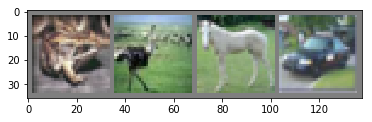

In [26]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)

images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' %classes[labels[i]] for i in range(4)))

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net().cuda()

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch+1, i+1, running_loss/2000))
            running_loss = 0
print("Finished Training")

[1,  2000] loss: 2.176
[1,  4000] loss: 1.857
[1,  6000] loss: 1.657
[1,  8000] loss: 1.567
[1, 10000] loss: 1.500
[1, 12000] loss: 1.436
[2,  2000] loss: 1.382
[2,  4000] loss: 1.347
[2,  6000] loss: 1.320
[2,  8000] loss: 1.286
[2, 10000] loss: 1.276
[2, 12000] loss: 1.249
Finished Training


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(Variable(images.cuda()))

_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted==labels.cuda()).sum()
    
print("Test Accuracy on 10000 test images:", 100*correct/total)

## Data Parallelism

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [2]:
class RandomDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
        
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len

    
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, input):
        output = self.fc(input)
        print("  In Model: input size", input.size(), "output size", output.size())
        return output

In [9]:
input_size=5
output_size=2
batch_size=30
data_size=100
   
rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                         batch_size=batch_size, shuffle=True)
model = Model(input_size, output_size)

In [11]:
if torch.cuda.device_count() >1:
    print("let's use", torch.cuda.device_count(), "GPUs")
    model = nn.DataParallel(model).cuda()

for data in rand_loader:
    input_var = Variable(data.cuda())
    output = model(input_var)
    print("Outside: input size", input_var.size(), 
          "output_size", output.size())

let's use 2 GPUs
  In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])


KeyboardInterrupt: 